In [2]:
import pandas as pd
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [3]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):
    data = yf.download(tickers=ticker,start=START,end=TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
# ticker = "AAPL"
ticker = "005930.KS"
df = load_data(ticker)


[*********************100%***********************]  1 of 1 completed


In [5]:
print(df.head())

        Date     Open     High      Low    Close     Adj Close    Volume
0 2010-01-04  16060.0  16180.0  16000.0  16180.0  12274.591797  11950800
1 2010-01-05  16520.0  16580.0  16300.0  16440.0  12471.832031  27925850
2 2010-01-06  16580.0  16820.0  16520.0  16820.0  12760.110352  22948850
3 2010-01-07  16820.0  16820.0  16260.0  16260.0  12335.280273  22107950
4 2010-01-08  16400.0  16420.0  16120.0  16420.0  12456.662109  14777550


In [6]:
print(df.tail())

           Date     Open     High      Low    Close  Adj Close    Volume
3610 2024-08-26  78100.0  78200.0  76000.0  76100.0    76100.0  15655938
3611 2024-08-27  75700.0  76500.0  75600.0  75800.0    75800.0  11130145
3612 2024-08-28  75800.0  76400.0  75400.0  76400.0    76400.0   9794514
3613 2024-08-29  73600.0  74700.0  73500.0  74000.0    74000.0  16884479
3614 2024-08-30  74400.0  75000.0  74100.0  74300.0    74300.0  16358520


In [7]:
print("Size of dataset is ",len(df))


Size of dataset is  3615


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3615 non-null   datetime64[ns]
 1   Open       3615 non-null   float64       
 2   High       3615 non-null   float64       
 3   Low        3615 non-null   float64       
 4   Close      3615 non-null   float64       
 5   Adj Close  3615 non-null   float64       
 6   Volume     3615 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 197.8 KB


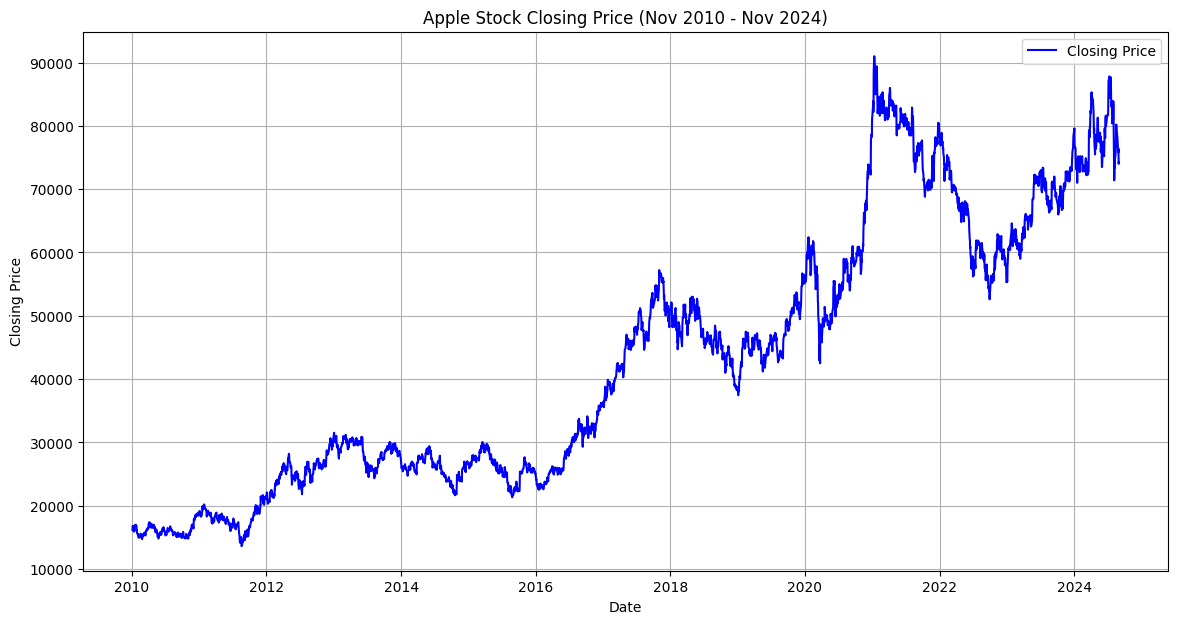

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Apple Stock Closing Price (Nov 2010 - Nov 2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
ma100 = df['Close'].rolling(100).mean()
print(ma100.sample(5))

711     25229.2
690     24865.2
2515    55283.0
2426    46733.5
708     25168.6
Name: Close, dtype: float64


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

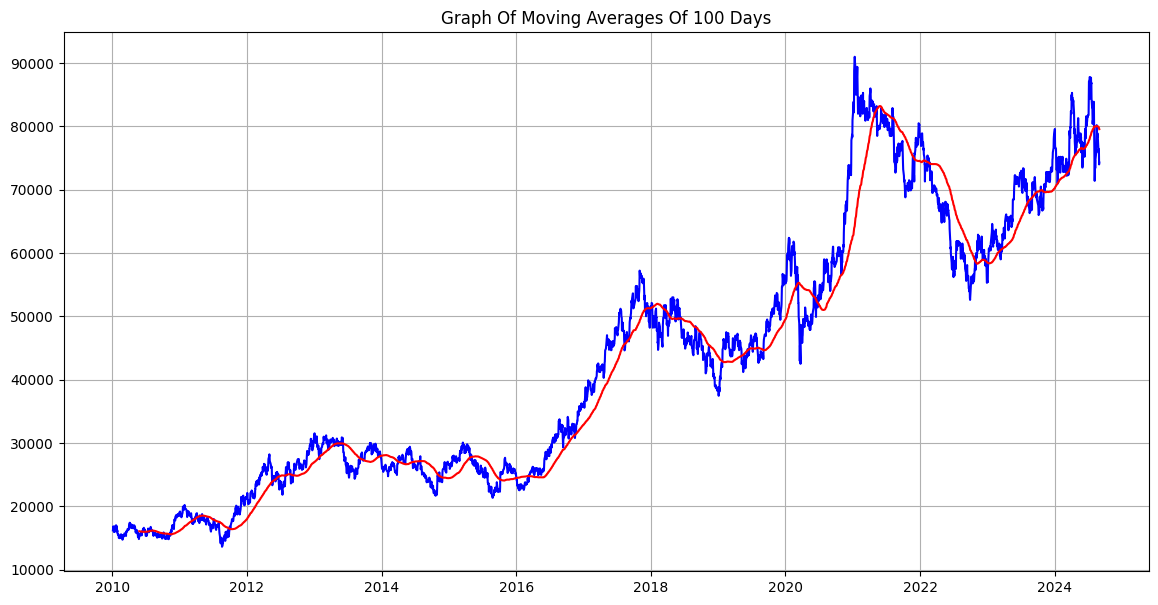

In [11]:
plt.figure(figsize = (14,7))
plt.plot(df['Date'], df['Close'], color='blue')
plt.plot(df['Date'], ma100, color='red')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [12]:
ma200 = df['Close'].rolling(200).mean()
print(ma200.sample(5))

2099    50623.4
1891    41396.6
1851    38119.4
3187    62711.0
3264    59592.0
Name: Close, dtype: float64


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

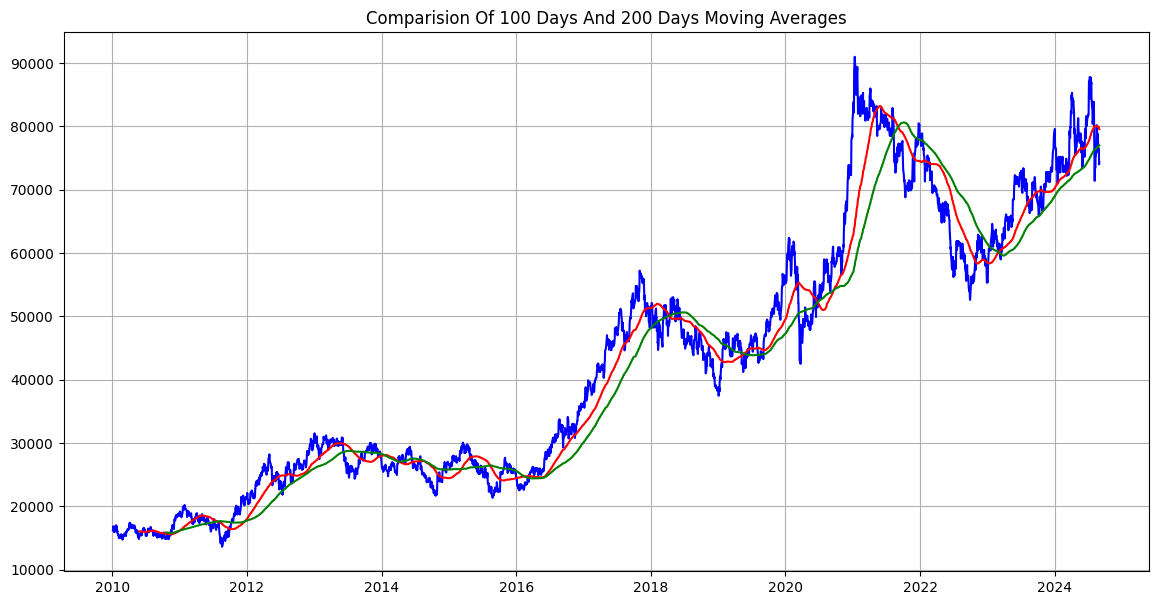

In [13]:
plt.figure(figsize = (14,7))
plt.plot(df['Date'], df['Close'], color='blue')
plt.plot(df['Date'], ma100, color='red')
plt.plot(df['Date'], ma200, color='green')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [14]:
train = pd.DataFrame(df[0:int(len(df)*0.70)])
test = pd.DataFrame(df[int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(2530, 7)
(1085, 7)


In [15]:
print(train.head())

        Date     Open     High      Low    Close     Adj Close    Volume
0 2010-01-04  16060.0  16180.0  16000.0  16180.0  12274.591797  11950800
1 2010-01-05  16520.0  16580.0  16300.0  16440.0  12471.832031  27925850
2 2010-01-06  16580.0  16820.0  16520.0  16820.0  12760.110352  22948850
3 2010-01-07  16820.0  16820.0  16260.0  16260.0  12335.280273  22107950
4 2010-01-08  16400.0  16420.0  16120.0  16420.0  12456.662109  14777550


In [16]:
print(test.head())

           Date     Open     High      Low    Close     Adj Close    Volume
2530 2020-04-06  47500.0  48800.0  47250.0  48700.0  43637.613281  23395726
2531 2020-04-07  49650.0  50200.0  49000.0  49600.0  44444.058594  31524034
2532 2020-04-08  49600.0  49750.0  48600.0  48600.0  43548.011719  25010314
2533 2020-04-09  49750.0  49800.0  48700.0  49100.0  43996.035156  22628058
2534 2020-04-10  48950.0  49250.0  48650.0  49250.0  44130.457031  17839111


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [19]:
data_training_array = scaler.fit_transform(train_close)
print(data_training_array)

[[0.05286885]
 [0.05819672]
 [0.06598361]
 ...
 [0.65983607]
 [0.68032787]
 [0.68442623]]


In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(2430, 100, 1)

In [22]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1)))

model.add(LSTM(units=50, return_sequences=True))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.1222
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010 - mean_absolute_error: 0.0240
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010 - mean_absolute_error: 0.0238
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0010 - mean_absolute_error: 0.0233
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 8.7616e-04 - mean_absolute_error: 0.0217
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.3525e-04 - mean_absolute_error: 0.0215
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.3836e-04 - mean_absolute_error: 0.0220
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.0634e-04 - mean_absolute_error: 0.0210
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.3453e-04 - mean_absolute_error: 0.0200
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.2560e-04 - mean_absolute_error: 0.0200
Epoch

In [26]:
model.save('model2.h5')

In [27]:
print(test_close.shape)

(1085, 1)


In [28]:
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)

final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [29]:
print(final_df.head())

         0
0  51600.0
1  52600.0
2  52500.0
3  52800.0
4  53700.0


In [30]:
test_data = scaler.fit_transform(final_df)
print(test_data)

[[0.18762887]
 [0.20824742]
 [0.20618557]
 ...
 [0.69896907]
 [0.64948454]
 [0.6556701 ]]


In [31]:
x_test = []
y_test = []
for i in range(100, test_data.shape[0]):
   x_test.append(test_data[i-100: i])
   y_test.append(test_data[i, 0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1085, 100, 1)
(1085,)


In [33]:
y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [34]:
print(y_pred.shape)

(1085, 1)


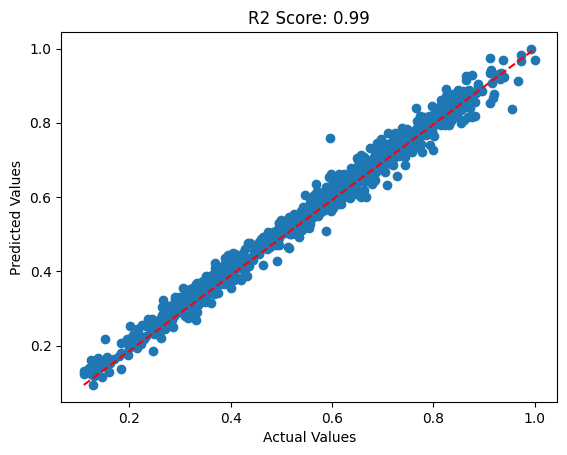

In [37]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

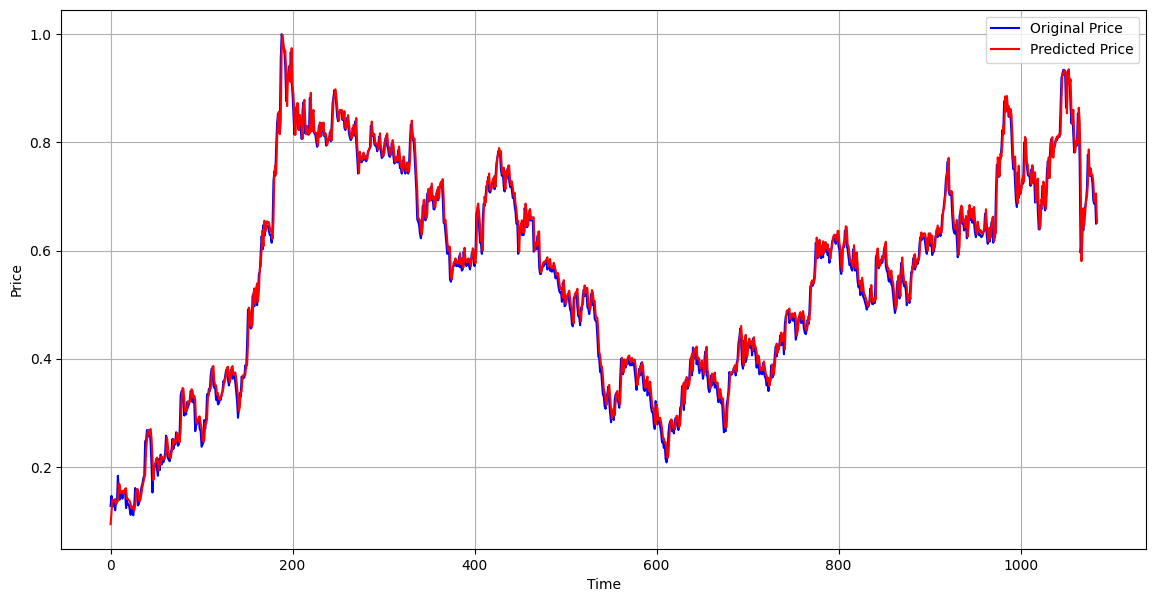

In [38]:
plt.figure(figsize = (14,7))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

n = len(y_test)  
p = x_test.shape[2] 
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
print("Adjusted R2 score:", adjusted_r2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

R2 score: 0.9869734433678915
Adjusted R2 score: 0.9869614151530881
Root Mean Squared Error (RMSE): 0.02290614999773959
Mean absolute error on test set: 3.09%
